In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import pandas as pd
import seaborn as sns

In [4]:
holidays = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\holidays_events.csv')
oil = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\oil.csv')
sample_submission = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\sample_submission.csv')
stores = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\stores.csv')
test = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\test.csv')
train = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\train.csv') #3000888 
#transactions = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\transactions.csv')
transactions = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\transactions3.csv')
temp = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\temp.csv')


## feature selection을 위한 데이터셋 생성

In [34]:
temp = pd.merge(train, stores, how= 'inner', on='store_nbr') # 3000888 

In [35]:
transactions['store_nbr'] = transactions['store_nbr'].astype(int).astype(str)

In [36]:
temp['store_nbr'] = temp['store_nbr'].astype(int).astype(str)

In [37]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [38]:
temp['date'] = pd.to_datetime(temp['date'])

In [39]:
temp = pd.merge(temp, transactions, how='inner', on=['date', 'store_nbr'])

### oil

In [40]:
oil['date'] = pd.to_datetime(oil['date'])
temp = pd.merge(temp, oil, how='left', on='date')
# 결측값 보간 (interpolation)
temp['oil_price'] = temp['dcoilwtico'].fillna(method='ffill')
# 결측값 보간 (interpolation)
temp['oil_price'] = temp['dcoilwtico'].fillna(method='bfill')
temp.drop(columns=['dcoilwtico'], inplace=True)

In [43]:
temp[(temp['store_nbr']=='1')&(temp['family']=='AUTOMOTIVE')].head(100)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,transactions,day_of_week,dcoilwtico,oil_price
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,0.0,Tuesday,NaN,NaN
33,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,Quito,Pichincha,D,13,2111.0,Wednesday,93.14,93.14
66,3564,2013-01-03,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,1833.0,Thursday,92.97,92.97
99,5346,2013-01-04,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,1863.0,Friday,93.12,93.12
132,7128,2013-01-05,1,AUTOMOTIVE,5.0,0,Quito,Pichincha,D,13,1509.0,Saturday,NaN,93.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,169290,2013-04-06,1,AUTOMOTIVE,2.0,0,Quito,Pichincha,D,13,1349.0,Saturday,NaN,92.76
3168,171072,2013-04-07,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,521.0,Sunday,NaN,92.76
3201,172854,2013-04-08,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,1824.0,Monday,93.36,93.36
3234,174636,2013-04-09,1,AUTOMOTIVE,4.0,0,Quito,Pichincha,D,13,1744.0,Tuesday,94.18,94.18


### earthquake

In [ ]:
# 지진 일어난 날 feature로 넣어줌
https://www.worlddata.info/america/ecuador/earthquakes.php
https://es.wikipedia.org/wiki/Terremoto_de_Ecuador_de_2016
https://www.usaid.gov/sites/default/files/2022-05/ecuador_eq_fs03_04-29-2016_0.pdf

In [47]:
earthquake = pd.read_csv(r'C:\Users\user\upstage3-python\ml_project_3\earthquake.csv')

In [48]:
earthquake['date'] = pd.to_datetime(earthquake['date'])

In [49]:
earthquake

,date,state,magnitude,deaths
0,2016-12-19,Esmeraldas,5.4,3
1,2016-05-18,Manabi,6.9,1
2,2016-04-16,Manabi,7.8,662
3,2016-04-16,Esmeraldas,7.8,662
4,2014-08-12,Quito,5.1,2
5,2011-10-29,Pomasqui,4.0,0


In [50]:
temp = pd.merge(temp, earthquake, how='left', on=['date','state'])

In [51]:
# 결측치 처리
temp['magnitude'].fillna(0, inplace=True)
temp['deaths'].fillna(0, inplace=True)

In [52]:
temp.to_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\temp.csv', index=False)

In [209]:
temp = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\temp.csv') #3000888 

### holidays

In [210]:
# local == city
# Regional == state

Local_holidays = holidays[(holidays['locale']=='Local')& (holidays['transferred']==False) & (holidays['type']!='Event')]
Regional_holidays = holidays[(holidays['locale']=='Regional')& (holidays['transferred']==False) & (holidays['type']!='Event')]
National_holidays = holidays[(holidays['locale']=='National')& (holidays['transferred']==False) & (holidays['type']!='Event')]
Event_holidays = holidays[(holidays['type']=='Event')& (holidays['transferred']==False)]

In [211]:
Local_holidays['description'] = 1
Regional_holidays['description'] = 1
National_holidays['description'] = 1
Event_holidays['description'] = 1

C:\Users\user\AppData\Local\Temp\ipykernel_39496\3759092004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Local_holidays['description'] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_39496\3759092004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Regional_holidays['description'] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_39496\3759092004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [212]:
Local_holidays.drop(columns=['type','locale','transferred'],inplace=True)
Regional_holidays.drop(columns=['type','locale','transferred'],inplace=True)
National_holidays.drop(columns=['type','locale','transferred'],inplace=True)
Event_holidays.drop(columns=['type','locale','transferred'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_39496\93990026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Local_holidays.drop(columns=['type','locale','transferred'],inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_39496\93990026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Regional_holidays.drop(columns=['type','locale','transferred'],inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_39496\93990026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [213]:
Local_holidays.drop_duplicates(inplace=True)
Regional_holidays.drop_duplicates(inplace=True)
National_holidays.drop_duplicates(inplace=True)
Event_holidays.drop_duplicates(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_39496\2142247382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Local_holidays.drop_duplicates(inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_39496\2142247382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Regional_holidays.drop_duplicates(inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_39496\2142247382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  National_h

In [214]:
Local_holidays.reset_index(drop=True, inplace=True)
Regional_holidays.reset_index(drop=True, inplace=True)
National_holidays.reset_index(drop=True, inplace=True)
Event_holidays.reset_index(drop=True, inplace=True)

In [215]:
temp = pd.merge(temp, Local_holidays, left_on=['date','city'], right_on=['date','locale_name'], how='left')
temp.drop(columns=['locale_name'], inplace=True)
temp = temp.rename(columns={'description': 'local_holiday'})
temp['local_holiday'] = temp['local_holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

In [216]:
temp = pd.merge(temp, Regional_holidays, left_on=['date','state'], right_on=['date','locale_name'], how='left')
temp.drop(columns=['locale_name'], inplace=True)
temp = temp.rename(columns={'description': 'regional_holiday'})
temp['regional_holiday'] = temp['regional_holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

In [217]:
temp = pd.merge(temp, National_holidays, left_on=['date'], right_on=['date'], how='left')
temp.drop(columns=['locale_name'], inplace=True)
temp = temp.rename(columns={'description': 'national_holiday'})
temp['national_holiday'] = temp['national_holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

In [218]:
temp = pd.merge(temp, Event_holidays, left_on=['date'], right_on=['date'], how='left')
temp.drop(columns=['locale_name'], inplace=True)
temp = temp.rename(columns={'description': 'event_holiday'})
temp['event_holiday'] = temp['event_holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

In [219]:
temp.shape[0]

3000888

In [231]:
temp.drop(columns=['id'], inplace=True)

In [389]:
temp.to_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\temp.csv', index=False)

In [ ]:
temp = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\temp.csv') #3000888 

## Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.  

In [380]:
temp['date'] = pd.to_datetime(temp['date'])

In [381]:
month_end_dates  = pd.date_range(start='2013-01-01', end='2017-08-15', freq='M')

temp['wage'] = temp['date'].apply(lambda x: 1 if (x in month_end_dates or x.day == 15) else 0)

## year month day

In [383]:
temp['year'] = temp['date'].dt.year
temp['month'] = temp['date'].dt.month
temp['day'] = temp['date'].dt.day

## 요일별 연평균 매출, 요일별 연평균 품목 매출 추가

In [ ]:
# 상점별, 카테고리별 매출 합계 계산
pivot_df = temp_2016[['date','store_nbr','family','sales']].pivot_table(index='store_nbr', columns='family', values='sales', aggfunc='sum', fill_value=0)

In [ ]:
unique_families = list(set(temp['family']))

for i in range(1, 55):
    for j in unique_families:
        
        # 요일별 연평균 매출 계산
        average_sales_by_day = globals()[f'S{i:02d}_{j}'].groupby('day_of_week')['sales'].mean().to_dict()

        # 요일별 연평균 품목 매출 계산
        average_sales_by_day_family = globals()[f'S{i:02d}_{j}'].groupby(['day_of_week', 'family'])['sales'].mean().unstack().fillna(0).to_dict()

        # 데이터셋에 특징 추가
        globals()[f'S{i:02d}_{j}']['average_sales_by_day'] = globals()[f'S{i:02d}_{j}']['day_of_week'].map(average_sales_by_day)
        globals()[f'S{i:02d}_{j}']['average_sales_by_day_family'] = globals()[f'S{i:02d}_{j}'].apply(lambda row: average_sales_by_day_family.get((row['day_of_week'], row['family']), 0), axis=1)




## cluster 찾기

## rolling SETTING
store_nbr=1, 'PREPARED FOODS'에 대해서만 셋팅한 경우
RandomForestRegressor --> 결과 RMSLE: 0.15724344451076833
XGBOOST --> 결과: RMSLE: 0.15603624756864212

In [8]:
temp['date'] = pd.to_datetime(temp['date'])
temp_2013 = temp[temp['date'].dt.year==2013]
temp_2014 = temp[temp['date'].dt.year==2014]
temp_2015 = temp[temp['date'].dt.year==2015]
temp_2016 = temp[temp['date'].dt.year==2016]
temp_2017 = temp[temp['date'].dt.year==2017]

In [9]:
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    return mape

In [6]:
unique_families = list(set(temp['family']))
print(unique_families)

['PREPARED FOODS', 'PERSONAL CARE', 'HARDWARE', 'BREAD/BAKERY', 'BOOKS', 'HOME CARE', 'PLAYERS AND ELECTRONICS', 'GROCERY I', 'LAWN AND GARDEN', 'BEVERAGES', 'GROCERY II', 'CLEANING', 'LADIESWEAR', 'POULTRY', 'EGGS', 'HOME AND KITCHEN II', 'BABY CARE', 'BEAUTY', 'DELI', 'PRODUCE', 'CELEBRATION', 'LINGERIE', 'SEAFOOD', 'PET SUPPLIES', 'HOME AND KITCHEN I', 'AUTOMOTIVE', 'LIQUOR,WINE,BEER', 'FROZEN FOODS', 'MAGAZINES', 'DAIRY', 'SCHOOL AND OFFICE SUPPLIES', 'MEATS', 'HOME APPLIANCES']


In [181]:
data_frames = []

for i in range(1, 55):
    #for j in unique_families:
    for j in ['MEATS']:
        filtered_df = temp_2016[(temp_2016['store_nbr'] == i) & (temp_2016['family'] == j)]
        
        filtered_df['slope7'] = filtered_df['sales'].rolling(7).apply(get_slope, raw=True)
        filtered_df['slope14'] = filtered_df['sales'].rolling(14).apply(get_slope, raw=True)

        filtered_df['std7'] = filtered_df['sales'].rolling(7).std(raw=True)
        filtered_df['std14'] = filtered_df['sales'].rolling(14).std(raw=True)

        filtered_df['mean7'] = filtered_df['sales'].rolling(7).mean(raw=True)
        filtered_df['mean14'] = filtered_df['sales'].rolling(14).mean(raw=True)

        filtered_df['skew7'] = filtered_df['sales'].rolling(7).skew()
        filtered_df['skew14'] = filtered_df['sales'].rolling(14).skew()

        filtered_df['kurt7'] = filtered_df['sales'].rolling(7).kurt()
        filtered_df['kurt14'] = filtered_df['sales'].rolling(14).kurt()

        filtered_df['min7'] = filtered_df['sales'].rolling(7).min()
        filtered_df['min14'] = filtered_df['sales'].rolling(14).min()

        filtered_df['max7'] = filtered_df['sales'].rolling(7).max()
        filtered_df['max14'] = filtered_df['sales'].rolling(14).max()
        
        
        if not filtered_df.empty:
            globals()[f'S{i:02d}_{j}'] = filtered_df
            data_frames.append(filtered_df)

# 모든 DataFrame을 하나로 결합
rfd = pd.concat(data_frames, ignore_index=True)

print(rfd)

C:\Users\user\AppData\Local\Temp\ipykernel_15872\2458258665.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['slope7'] = filtered_df['sales'].rolling(7).apply(get_slope, raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15872\2458258665.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['slope14'] = filtered_df['sales'].rolling(14).apply(get_slope, raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15872\2458258665.py:11: FutureWarning: Passing additional kwargs to Rolling.s

            date  store_nbr family       sales  onpromotion       city  \
0     2016-01-01          1  MEATS    0.000000            0      Quito   
1     2016-01-02          1  MEATS  222.967000            0      Quito   
2     2016-01-03          1  MEATS  114.825000            0      Quito   
3     2016-01-04          1  MEATS  358.597020            0      Quito   
4     2016-01-05          1  MEATS  412.125000            0      Quito   
...          ...        ...    ...         ...          ...        ...   
19705 2016-12-27         54  MEATS   32.664000            0  El Carmen   
19706 2016-12-28         54  MEATS   41.762000            0  El Carmen   
19707 2016-12-29         54  MEATS   58.629000            9  El Carmen   
19708 2016-12-30         54  MEATS   34.811000            0  El Carmen   
19709 2016-12-31         54  MEATS   61.119003            0  El Carmen   

           state type  cluster  transactions  ...      mean7     mean14  \
0      Pichincha    D       13      

C:\Users\user\AppData\Local\Temp\ipykernel_15872\2458258665.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['slope7'] = filtered_df['sales'].rolling(7).apply(get_slope, raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15872\2458258665.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['slope14'] = filtered_df['sales'].rolling(14).apply(get_slope, raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15872\2458258665.py:11: FutureWarning: Passing additional kwargs to Rolling.s

In [214]:
#testset= rfd[rfd['store_nbr']==25]
testset = rfd

In [219]:
testset.head(10)

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,transactions,...,mean7,mean14,skew7,skew14,kurt7,kurt14,min7,min14,max7,max14
13,2016-01-14,1,MEATS,307.52300,2,Quito,Pichincha,D,13,1782.0,...,308.180430,272.337216,1.586815,0.682674,3.967067,2.226542,109.844,0.000,645.50903,645.50903
14,2016-01-15,1,MEATS,673.71400,46,Quito,Pichincha,D,13,1872.0,...,312.209711,320.459645,1.702602,1.164099,4.225251,1.182775,109.844,109.844,673.71400,673.71400
15,2016-01-16,1,MEATS,230.92400,1,Quito,Pichincha,D,13,1329.0,...,312.079854,321.028002,1.702880,1.163577,4.220817,1.198924,109.844,109.844,673.71400,673.71400
16,2016-01-17,1,MEATS,126.68700,0,Quito,Pichincha,D,13,513.0,...,314.485997,321.875288,1.829742,1.198381,4.477689,1.238560,126.687,109.844,673.71400,673.71400
17,2016-01-18,1,MEATS,281.43700,0,Quito,Pichincha,D,13,1854.0,...,317.625714,316.363858,1.790193,1.314422,4.433038,1.472915,126.687,109.844,673.71400,673.71400
18,2016-01-19,1,MEATS,256.81702,1,Quito,Pichincha,D,13,1718.0,...,311.883860,305.270431,1.874826,1.573797,4.587232,2.233179,126.687,109.844,673.71400,673.71400
19,2016-01-20,1,MEATS,340.94800,1,Quito,Pichincha,D,13,1885.0,...,316.864289,307.517931,1.743792,1.518208,4.096218,2.075297,126.687,109.844,673.71400,673.71400
20,2016-01-21,1,MEATS,393.46802,0,Quito,Pichincha,D,13,1667.0,...,329.142149,318.661289,1.398680,1.293588,2.750225,1.527110,126.687,109.844,673.71400,673.71400
21,2016-01-22,1,MEATS,685.83300,48,Quito,Pichincha,D,13,1763.0,...,330.873434,321.541573,1.450684,1.361737,2.899767,1.634310,126.687,109.844,685.83300,685.83300
22,2016-01-23,1,MEATS,221.18900,0,Quito,Pichincha,D,13,1322.0,...,329.482720,320.781287,1.447286,1.361127,2.834743,1.613983,126.687,109.844,685.83300,685.83300


In [218]:
#testset = testset[14:]
testset = testset[testset['date']>='2016-01-14']

In [220]:
testset.reset_index(inplace=True, drop=True)
testset.index = testset.index + 1

In [221]:
# 요일을 숫자로 매핑
day_to_num = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# 'day_of_week' 컬럼을 숫자로 변환
testset['day_of_week_num'] = testset['day_of_week'].map(day_to_num)

C:\Users\user\AppData\Local\Temp\ipykernel_15872\3857502810.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset['day_of_week_num'] = testset['day_of_week'].map(day_to_num)


In [222]:
testset = testset[['sales','onpromotion','transactions','day_of_week_num', 'oil_price','deaths','event_holiday', 'wage', 'year', 'month', 'day','slope7', 'slope14', 'std7', 'std14', 'mean7', 'mean14', 'skew7', 'skew14', 'kurt7', 'kurt14', 'min7', 'min14', 'max7', 'max14']]

In [223]:
testset.reset_index(inplace=True, drop=False)

In [224]:
testset

,index,sales,onpromotion,transactions,day_of_week_num,oil_price,deaths,event_holiday,wage,year,...,mean7,mean14,skew7,skew14,kurt7,kurt14,min7,min14,max7,max14
0,1,307.523000,2,1782.0,3,31.22,0.0,0,0,2016,...,308.180430,272.337216,1.586815,0.682674,3.967067,2.226542,109.844000,0.000000,645.509030,645.509030
1,2,673.714000,46,1872.0,4,29.45,0.0,0,1,2016,...,312.209711,320.459645,1.702602,1.164099,4.225251,1.182775,109.844000,109.844000,673.714000,673.714000
2,3,230.924000,1,1329.0,5,28.47,0.0,0,0,2016,...,312.079854,321.028002,1.702880,1.163577,4.220817,1.198924,109.844000,109.844000,673.714000,673.714000
3,4,126.687000,0,513.0,6,28.47,0.0,0,0,2016,...,314.485997,321.875288,1.829742,1.198381,4.477689,1.238560,126.687000,109.844000,673.714000,673.714000
4,5,281.437000,0,1854.0,0,28.47,0.0,0,0,2016,...,317.625714,316.363858,1.790193,1.314422,4.433038,1.472915,126.687000,109.844000,673.714000,673.714000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19003,19004,32.664000,0,881.0,1,52.82,0.0,0,0,2016,...,44.272000,44.592857,-0.297480,-0.339638,-0.778182,-0.726808,31.213999,31.213999,57.655000,57.655000
19004,19005,41.762000,0,867.0,2,54.01,0.0,0,0,2016,...,43.030857,43.970000,0.161649,-0.123668,-0.187032,-0.621995,31.213999,31.213999,57.655000,57.655000
19005,19006,58.629000,9,885.0,3,53.80,0.0,0,0,2016,...,43.170000,45.495357,0.274202,-0.225873,0.022809,-0.541393,31.213999,31.213999,58.629000,58.629000
19006,19007,34.811000,0,1119.0,4,53.75,0.0,0,0,2016,...,41.954143,44.144071,0.612032,0.084726,-0.434195,-0.657689,31.213999,31.213999,58.629000,58.629000


In [203]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            351 non-null    int64  
 1   sales            351 non-null    float64
 2   onpromotion      351 non-null    int64  
 3   transactions     351 non-null    float64
 4   day_of_week_num  351 non-null    int64  
 5   oil_price        351 non-null    float64
 6   deaths           351 non-null    float64
 7   event_holiday    351 non-null    int64  
 8   wage             351 non-null    int64  
 9   year             351 non-null    int64  
 10  month            351 non-null    int64  
 11  day              351 non-null    int64  
 12  slope7           351 non-null    float64
 13  slope14          351 non-null    float64
 14  std7             351 non-null    float64
 15  std14            351 non-null    float64
 16  mean7            351 non-null    float64
 17  mean14          

In [225]:
y = testset['sales']
X = testset.drop('sales', axis=1).fillna(0)

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle=False)

### RandomForestRegressor --> 결과 RMSLE: 0.15724344451076833

MAPE: inf


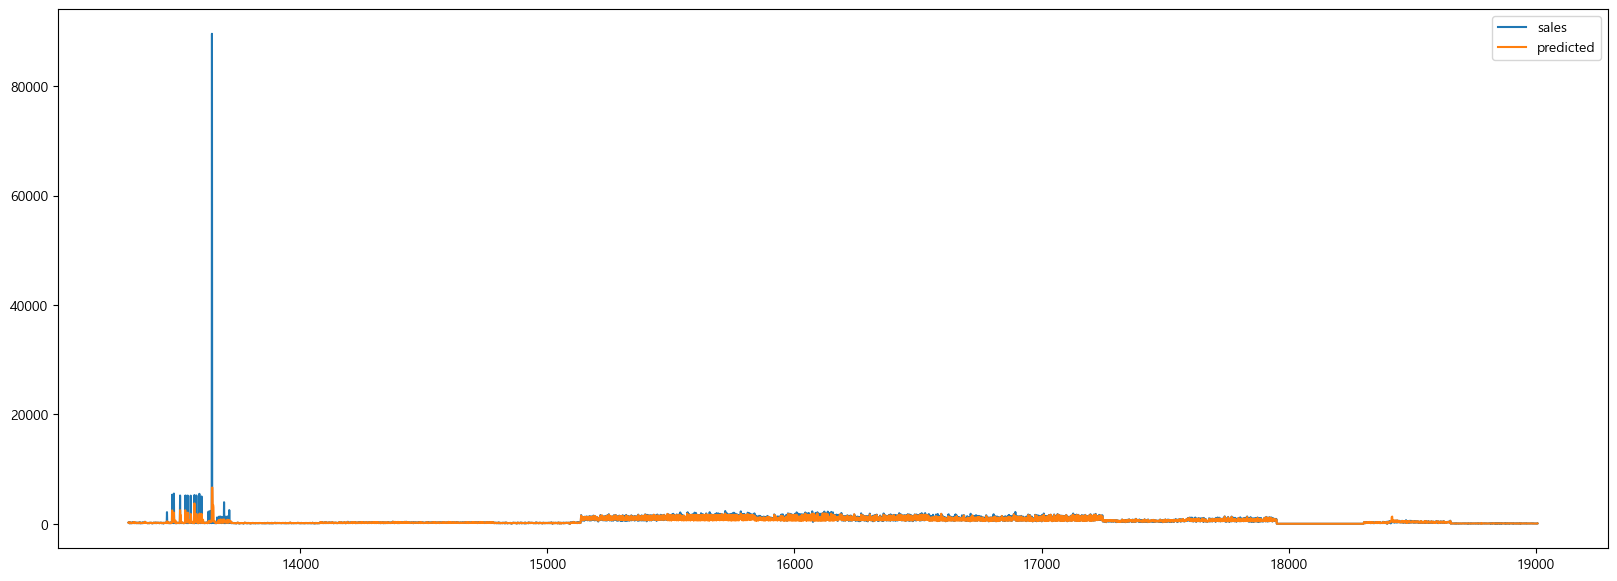

In [226]:
# Default 세팅으로 RandomForest 학습
rf = RandomForestRegressor(random_state = 0)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
predicted = np.where(predicted < 0, 0, predicted) # 예측값이 0보다 작으면 0으로 셋팅
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")

MAPE: inf


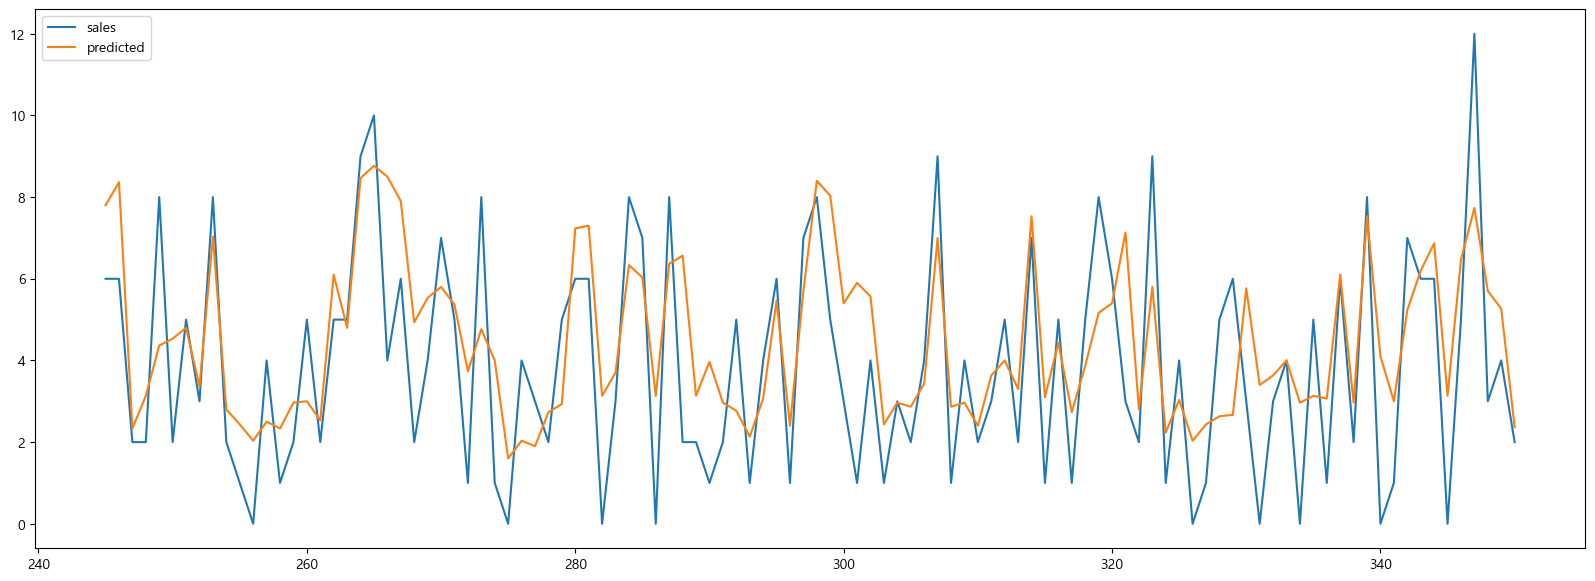

In [177]:
# Under fitting을 조정하기 위한 n_estimator와 max_features만 조정
rf = RandomForestRegressor(random_state = 0, n_estimators=30, max_features=50)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
predicted = np.where(predicted < 0, 0, predicted)# 예측값이 0보다 작으면 0으로 셋팅
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")

In [227]:
import numpy as np

def root_mean_squared_log_error(actual, predicted):
    log_diff = np.log1p(predicted) - np.log1p(actual)
    return np.sqrt(np.mean(log_diff**2))

# RMSLE 계산
rmsle = root_mean_squared_log_error(test_labels, predicted)
print(f"RMSLE: {rmsle}")


RMSLE: 0.3763313279703559


### XGBOOST --> 결과: RMSLE: 0.15603624756864212

In [130]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:28
   ---------------------------------------- 1.0/99.8 MB 9.2 MB/s eta 0:00:11
    --------------------------------------- 2.4/99.8 MB 15.0 MB/s eta 0:00:07
   - -------------------------------------- 3.8/99.8 MB 18.7 MB/s eta 0:00:06
   - -------------------------------------- 4.8/99.8 MB 21.6 MB/s eta 0:00:05
   -- ------------------------------------- 5.3/99.8 MB 17.7 MB/s eta 0:00:06
   -- ------------------------------------- 5.9/99.8 MB 18.0 MB/s eta 0:00:06
   -- ------------------------------------- 6.8/99.8 MB 18.1 MB/s eta 0:00:06
   --- ------------------------------------ 8.6/99.8 MB 20.2 MB/s eta 0:00:05
   --- ------------------------------------ 8.8/99.8 MB 18.8 MB/s eta 0:00:05
   --- ------------------------------------ 9.4/99.8 MB 18.1 MB/s eta 0:00:05
   -

        actual   predicted
13305  213.893  213.266464
13306  143.101  171.192230
13307  160.485  160.531769
13308  112.673  107.860626
13309  119.519  102.286179


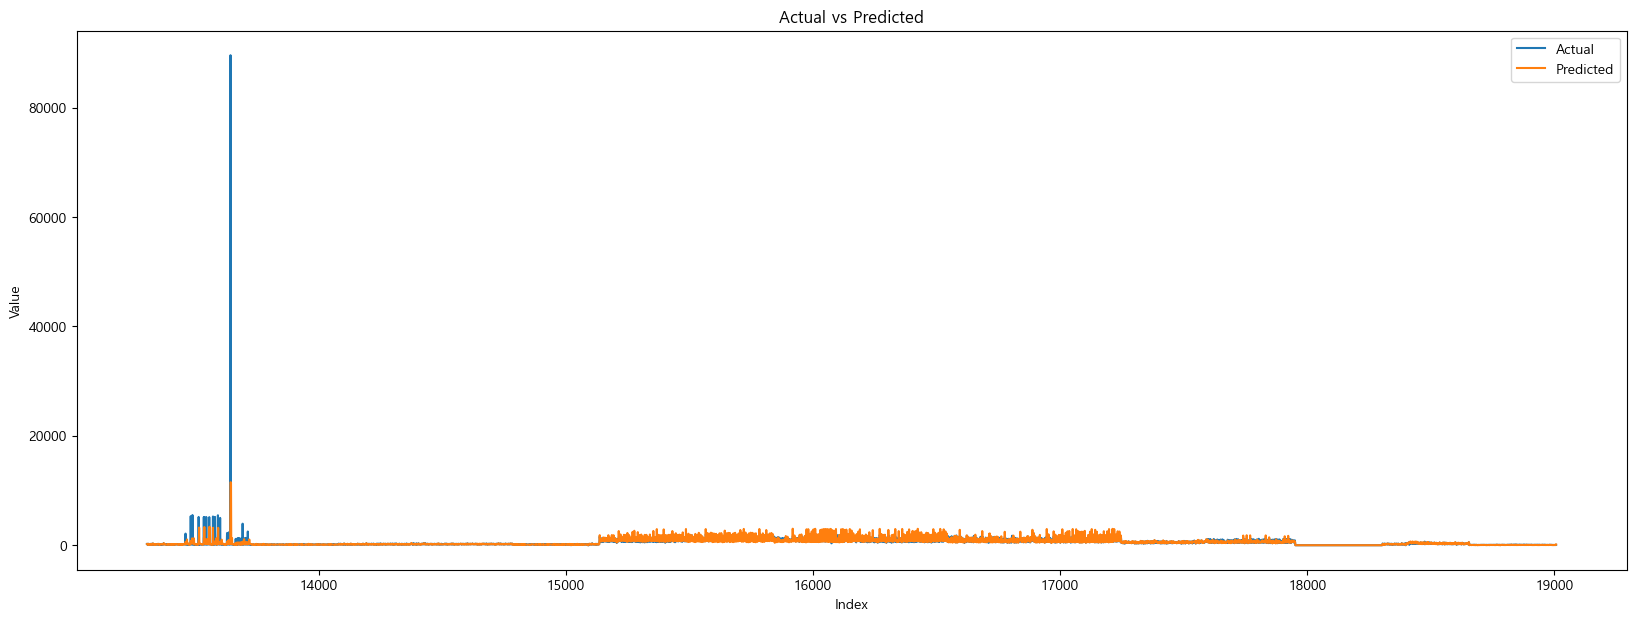

RMSLE: 0.34211343466383604


In [228]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# XGBoost 모델 학습
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)
xg_reg.fit(train_features, train_labels)

# 예측
predicted = xg_reg.predict(test_features)
predicted = np.where(predicted < 0, 0, predicted)# 예측값이 0보다 작으면 0으로 셋팅

# test_labels를 Pandas Series로 변환
test_labels_series = pd.Series(test_labels, name='actual')

# 예측 결과 DataFrame 생성
pdf = pd.DataFrame({'actual': test_labels_series, 'predicted': predicted})

# 데이터 확인
print(pdf.head())

# 플롯
pdf.plot(figsize=(20, 7))
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend(['Actual', 'Predicted'])
plt.show()

# RMSLE 계산 함수
def root_mean_squared_log_error(actual, predicted):
    log_diff = np.log1p(predicted) - np.log1p(actual)
    return np.sqrt(np.mean(log_diff**2))

# RMSLE 계산
rmsle = root_mean_squared_log_error(test_labels_series, predicted)
print(f"RMSLE: {rmsle}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [-0.69623418 -0.69681197 -0.69804289 -0.57480166 -0.57242985 -0.57186867
 -0.52055239 -0.51924965 -0.51905552 -0.68183235 -0.6844516  -0.68456973
 -0.53942623 -0.54337933 -0.54447457 -0.48633264 -0.49292397 -0.49497147
 -0.69613505 -0.69808907 -0.69832085 -0.55777849 -0.560969   -0.557343
 -0.50363034 -0.50629329 -0.50220994 -0.47252228 -0.46970574 -0.46088861
 -0.44797891 -0.44574586 -0.43680078 -0.44469948 -0.43849092 -0.43217813
 -0.46812034 -0.46971506 -0.46574951 -0.44656629 -0.45259484 -0.44465185
 -0.44381699 -0.44890694 -0.44280473 -0.49342569 -0.49694722 -0.48784535
 -0.4837941  -0.48240294 -0.47409422 -0.47847156 -0.48396242 -0.46832369
 -0.44191494 -0.45609413 -0.44523916         nan -0.43895665 -0.43715109
         nan -0.44272389         nan -0.46763038 -0.45639641 -0.44679078
 -0.45883016 -0.45573934 -

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best RMSLE score:  0.41821457748954877
        actual   predicted
13305  213.893  213.339493
13306  143.101  166.810120
13307  160.485  166.604614
13308  112.673  124.094460
13309  119.519  106.561424


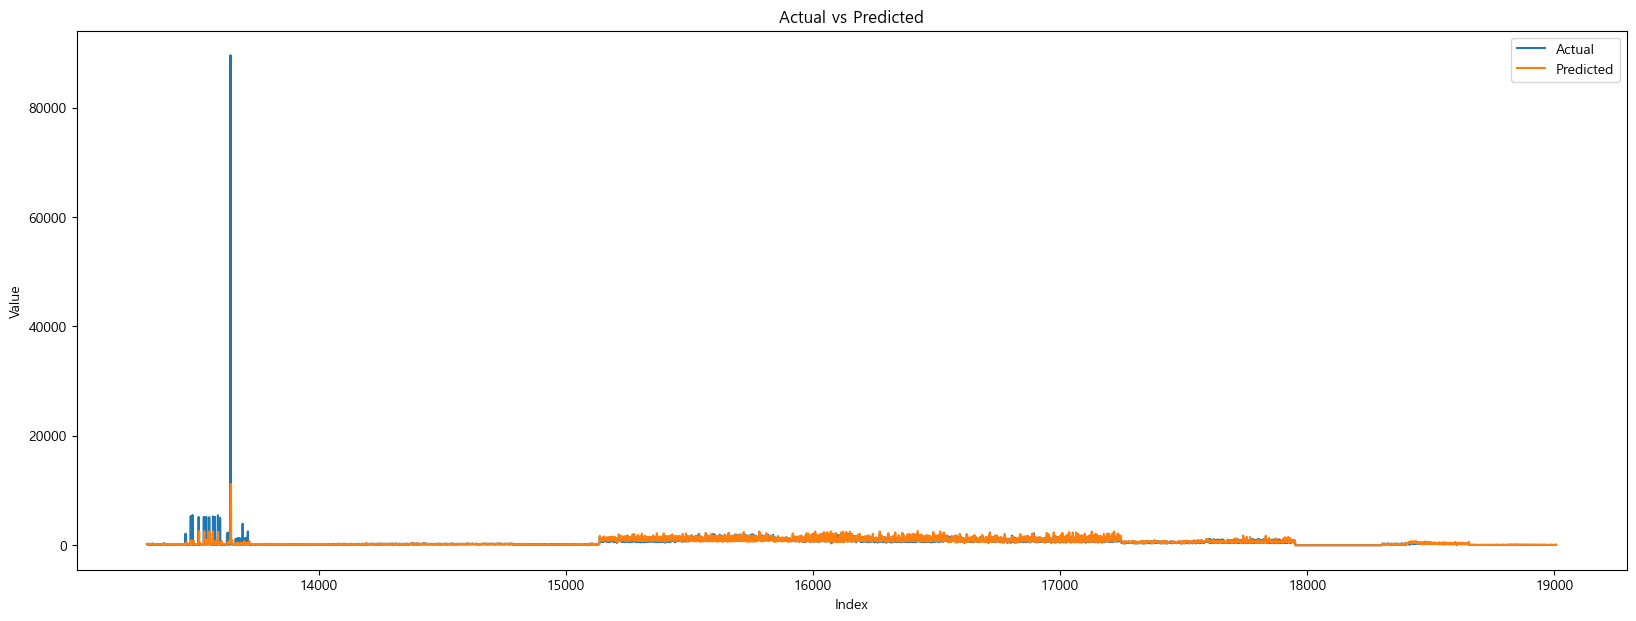

RMSLE: 0.34712185847899457


In [229]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error
import matplotlib.pyplot as plt

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# XGBoost 모델 생성
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

# GridSearchCV 수행
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring=rmsle_scorer, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(train_features, train_labels)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSLE score: ", -grid_search.best_score_)

# 최적의 하이퍼파라미터로 모델 생성
best_xg_reg = grid_search.best_estimator_

# 예측
predicted = best_xg_reg.predict(test_features)
predicted = np.where(predicted < 0, 0, predicted)# 예측값이 0보다 작으면 0으로 셋팅

# test_labels를 Pandas Series로 변환
test_labels_series = pd.Series(test_labels, name='actual')

# 예측 결과 DataFrame 생성
pdf = pd.DataFrame({'actual': test_labels_series, 'predicted': predicted})

# 데이터 확인
print(pdf.head())

# 플롯
pdf.plot(figsize=(20, 7))
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend(['Actual', 'Predicted'])
plt.show()

# RMSLE 계산 함수
def root_mean_squared_log_error(actual, predicted):
    log_diff = np.log1p(predicted) - np.log1p(actual)
    return np.sqrt(np.mean(log_diff**2))

# RMSLE 계산
rmsle = root_mean_squared_log_error(test_labels_series, predicted)
print(f"RMSLE: {rmsle}")


## 보류

In [ ]:
for i in range(1, 55):
    for j in unique_families:
        globals()[f'S{i:02d}_{j}'].to_csv(r"C:\Users\user\upstage3-python\09.ML_project_team03\globals()[f'S{i:02d}_{j}'].csv", index=False)

## Handling Multicollinearity: 특정 상점 corr 탐색 
corr의 경우 복잡한 family 요인같은 걸 지우는게 sales 예측에 도움이 된다.
deaths와 magnitude는 0.57로 상관관계가 높으므로 하나의 변수를 삭제한다.

In [257]:
temp.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state',
       'type', 'cluster', 'transactions', 'day_of_week', 'oil_price',
       'magnitude', 'deaths', 'local_holiday', 'regional_holiday',
       'national_holiday', 'event_holiday'],
      dtype='object')

In [320]:
sales19= temp[temp['store_nbr']==19][['date','sales']].groupby('date').sum('sales')
sales19.reset_index(drop=False, inplace=True)
others19= temp[temp['store_nbr']==19][['date','onpromotion','transactions','day_of_week','oil_price','magnitude','deaths','local_holiday','regional_holiday','national_holiday','event_holiday']]
others19.drop_duplicates(inplace=True)
sales19['date'] = pd.to_datetime(sales19['date'])
others19['date'] = pd.to_datetime(others19['date'])
temp19= pd.merge(sales19, others19, how='left', on='date')


In [353]:
sales53= temp[temp['store_nbr']==53][['date','sales']].groupby('date').sum('sales')
sales53.reset_index(drop=False, inplace=True)
others53= temp[temp['store_nbr']==53][['date','onpromotion','transactions','day_of_week','oil_price','magnitude','deaths','local_holiday','regional_holiday','national_holiday','event_holiday']]
others53.drop_duplicates(inplace=True)
sales53['date'] = pd.to_datetime(sales53['date'])
others53['date'] = pd.to_datetime(others53['date'])
temp53= pd.merge(sales53, others53, how='left', on='date')


C:\Users\user\AppData\Local\Temp\ipykernel_39496\70525392.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp53.corr(), annot=True, cmap='BuPu', square=True, linewidths=1)


<Axes: >

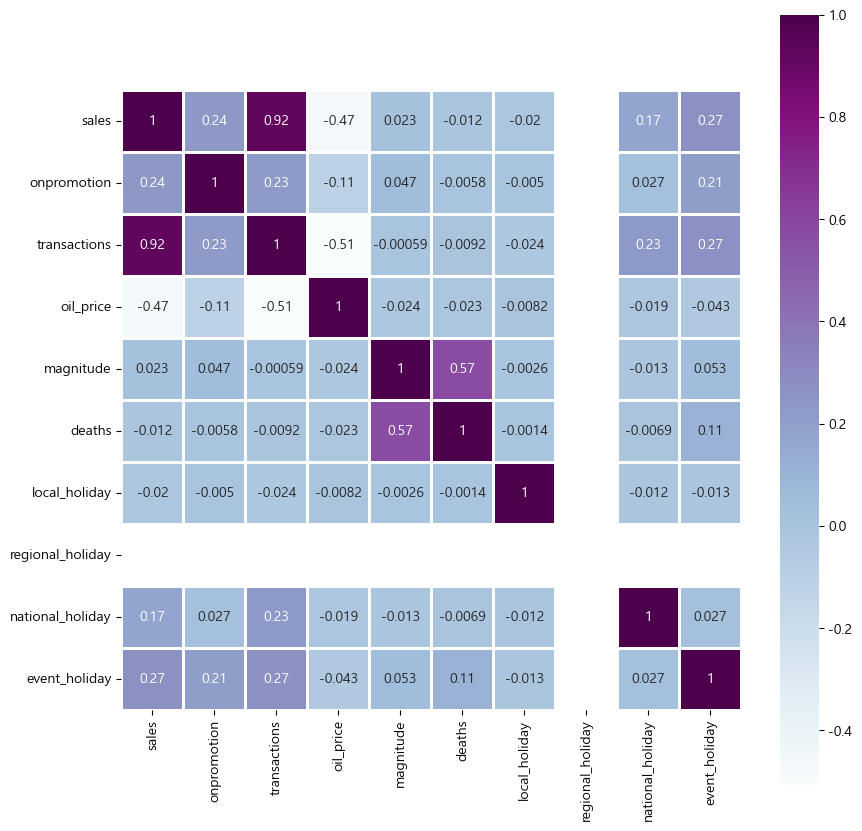

In [354]:
plt.figure(figsize=(10,10))
#mask = np.triu(np.ones_like(merged_item_training_df.corr(), dtype=bool))
sns.heatmap(temp53.corr(), annot=True, cmap='BuPu', square=True, linewidths=1)

C:\Users\user\AppData\Local\Temp\ipykernel_39496\3779788102.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp[temp['store_nbr']==53].corr(), annot=True, cmap='BuPu', square=True, linewidths=1)


<Axes: >

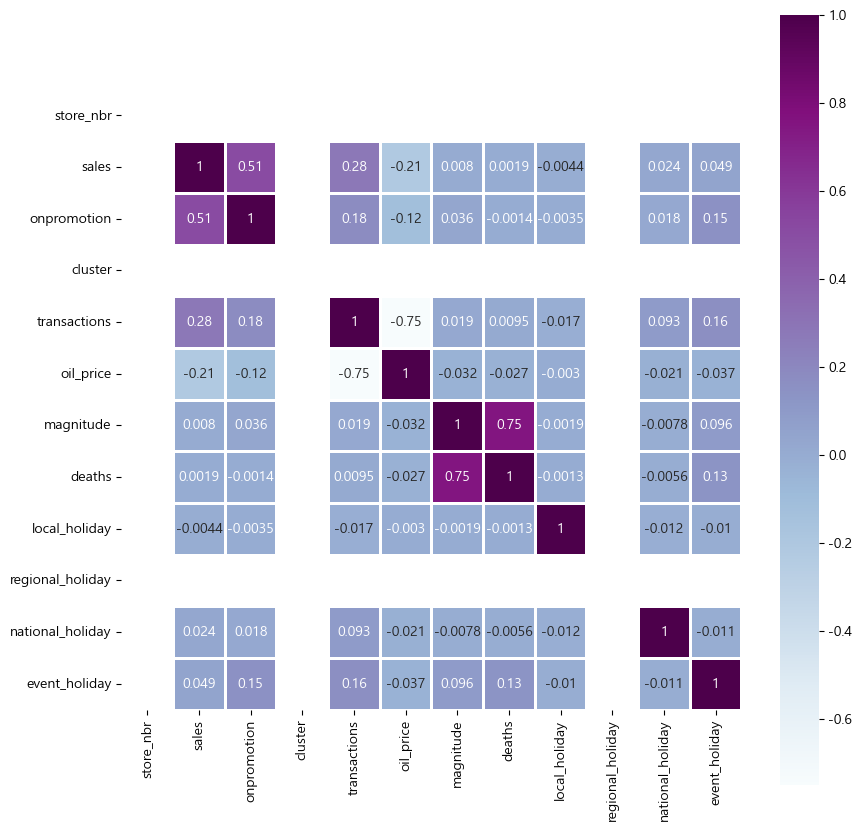

In [349]:
plt.figure(figsize=(10,10))
#mask = np.triu(np.ones_like(merged_item_training_df.corr(), dtype=bool))
sns.heatmap(temp[temp['store_nbr']==53].corr(), annot=True, cmap='BuPu', square=True, linewidths=1)

In [ ]:
PRODUCE, PREPARED FOODS

In [386]:
sales53_2= temp[(temp['store_nbr']==53)&(temp['family']=='POULTRY')][['date','sales']].groupby('date').sum('sales')
sales53_2.reset_index(drop=False, inplace=True)
others53_2= temp[(temp['store_nbr']==53)&(temp['family']=='POULTRY')][['date','onpromotion','transactions','day_of_week','oil_price','magnitude','deaths','local_holiday','regional_holiday','national_holiday','event_holiday']]
others53_2.drop_duplicates(inplace=True)
sales53_2['date'] = pd.to_datetime(sales53_2['date'])
others53_2['date'] = pd.to_datetime(others53_2['date'])
temp53_2= pd.merge(sales53_2, others53_2, how='left', on='date')

C:\Users\user\AppData\Local\Temp\ipykernel_39496\4221428806.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp53_2.corr(), annot=True, cmap='BuPu', square=True, linewidths=1)


<Axes: >

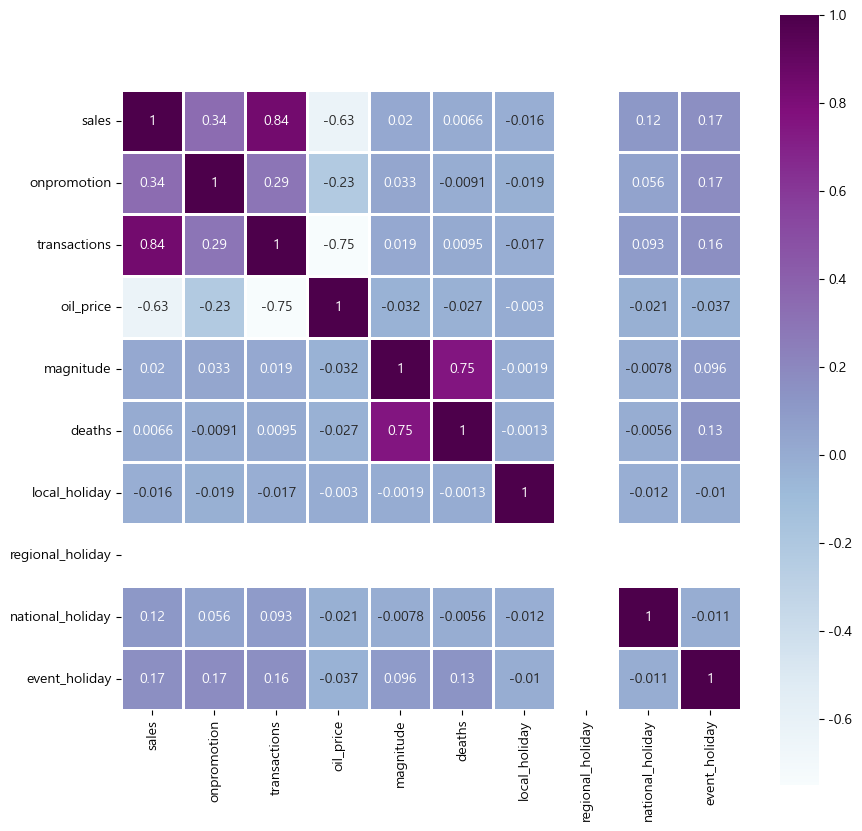

In [388]:
plt.figure(figsize=(10,10))
#mask = np.triu(np.ones_like(merged_item_training_df.corr(), dtype=bool))
sns.heatmap(temp53_2.corr(), annot=True, cmap='BuPu', square=True, linewidths=1)

In [365]:
sales19_2= temp[(temp['store_nbr']==19)&(temp['family']=='POULTRY')][['date','sales']].groupby('date').sum('sales')
sales19_2.reset_index(drop=False, inplace=True)
others19_2= temp[(temp['store_nbr']==19)&(temp['family']=='POULTRY')][['date','onpromotion','transactions','day_of_week','oil_price','magnitude','deaths','local_holiday','regional_holiday','national_holiday','event_holiday']]
others19_2.drop_duplicates(inplace=True)
sales19_2['date'] = pd.to_datetime(sales19_2['date'])
others19_2['date'] = pd.to_datetime(others19_2['date'])
temp19_2= pd.merge(sales19_2, others19_2, how='left', on='date')

C:\Users\user\AppData\Local\Temp\ipykernel_39496\1969962390.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp19_2.corr(), annot=True, cmap='BuPu', square=True, linewidths=1)


<Axes: >

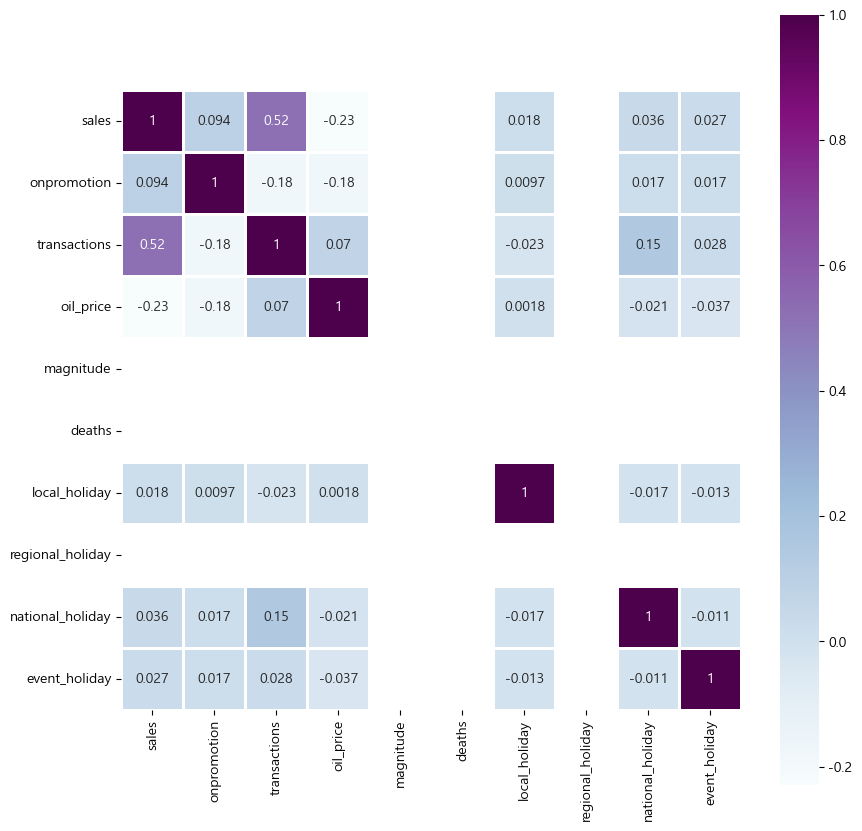

In [366]:
plt.figure(figsize=(10,10))
#mask = np.triu(np.ones_like(merged_item_training_df.corr(), dtype=bool))
sns.heatmap(temp19_2.corr(), annot=True, cmap='BuPu', square=True, linewidths=1)

## Handling Multicollinearity:  VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산을 위한 데이터 준비 (sales 제외)
X = df.drop(columns=['sales'])

# VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


## 요일별 매출 탐색

In [371]:
temp19_2013 = temp19[temp19['date'].dt.year==2013]
temp19_2014 = temp19[temp19['date'].dt.year==2014]
temp19_2015 = temp19[temp19['date'].dt.year==2015]
temp19_2016 = temp19[temp19['date'].dt.year==2016]
temp19_2017 = temp19[temp19['date'].dt.year==2017]

C:\Users\user\AppData\Local\Temp\ipykernel_39496\11531616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


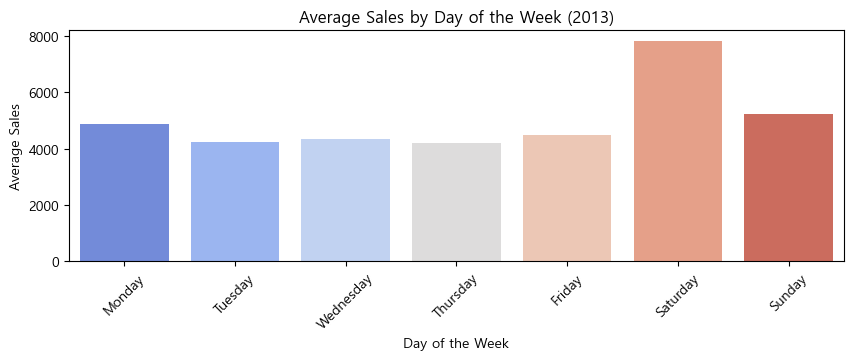

C:\Users\user\AppData\Local\Temp\ipykernel_39496\11531616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


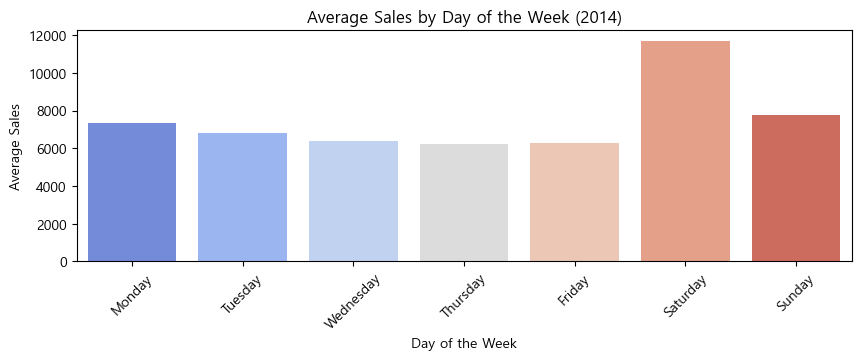

C:\Users\user\AppData\Local\Temp\ipykernel_39496\11531616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


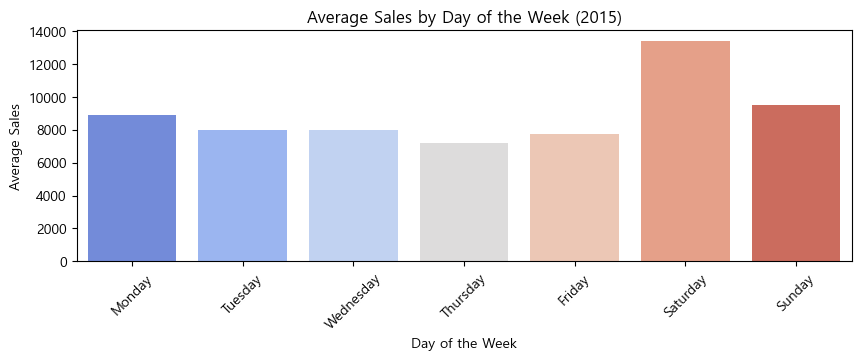

C:\Users\user\AppData\Local\Temp\ipykernel_39496\11531616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


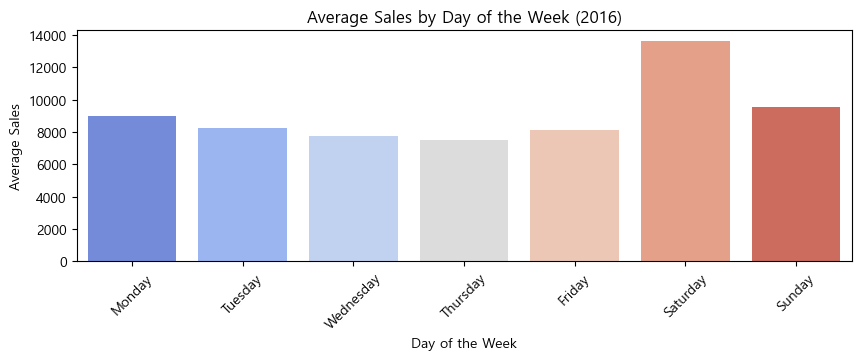

C:\Users\user\AppData\Local\Temp\ipykernel_39496\11531616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')


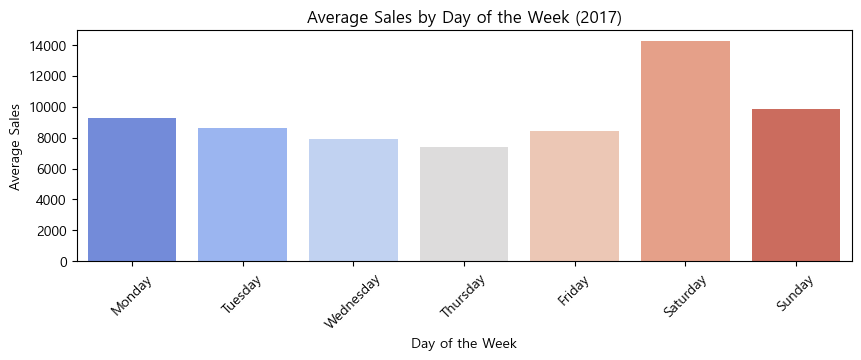

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(2013,2018):

    # 요일별 매출 집계
    sales_by_day = globals()[f'temp19_{i}'].groupby('day_of_week')['sales'].mean().reset_index()

    # 요일 순서 정렬
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sales_by_day['day_of_week'] = pd.Categorical(sales_by_day['day_of_week'], categories=days_order, ordered=True)
    sales_by_day = sales_by_day.sort_values('day_of_week')

    # 요일별 매출 시각화
    plt.figure(figsize=(10, 3))
    sns.barplot(data=sales_by_day, x='day_of_week', y='sales', palette='coolwarm')
    plt.title(f'Average Sales by Day of the Week ({i})')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Sales')
    plt.xticks(rotation=45)
    plt.show()


## 시간 시계열 데이터의 경우 ARIMA, Prophet, LSTM